In [29]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
 
X = np.array([0.5, 2.3, 2.9]).reshape(-1, 1)
y = np.array([1.4, 1.9, 3.2]).reshape(-1, 1)
 
def max_lik_estimate(X, y):
    theta_ml = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta_ml
 
def predict_with_estimate(Xtest, theta):
    y_pred = Xtest @ theta
    return y_pred
 
N, D = X.shape
X_aug = np.hstack((np.ones((N, 1)), X))
print(X_aug)
 
theta_ml = max_lik_estimate(X_aug, y)
print(theta_ml)

[[1.  0.5]
 [1.  2.3]
 [1.  2.9]]
[[0.94871795]
 [0.64102564]]


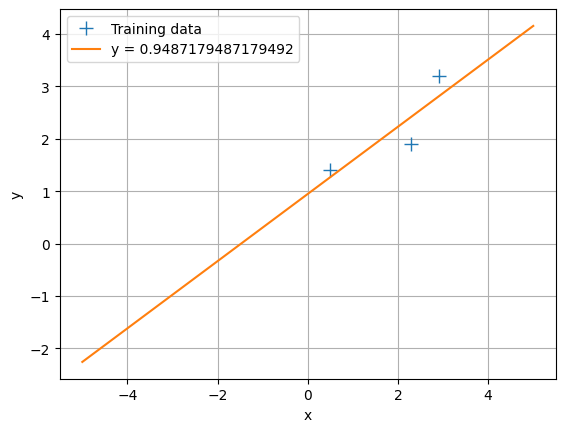

0.3849741916091627


In [30]:
# define test case
Xtest = np.linspace(-5, 5, 100).reshape(-1, 1)
Xtest_aug = np.hstack((np.ones((Xtest.shape[0], 1)), Xtest))
y_pred = predict_with_estimate(Xtest_aug, theta_ml)
 
plt.figure()
plt.plot(X, y, '+', markersize=10, label = 'Training data')
plt.plot(Xtest, y_pred, label = f'y = {theta_ml[0, 0]}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
 
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))
 
rsme_test = RMSE(y, X_aug @ theta_ml)
print(rsme_test)

Breaking at iteration 174937 due to NaN or increase in cost.
theta_gd: [[0.94871487]
 [0.64102695]]


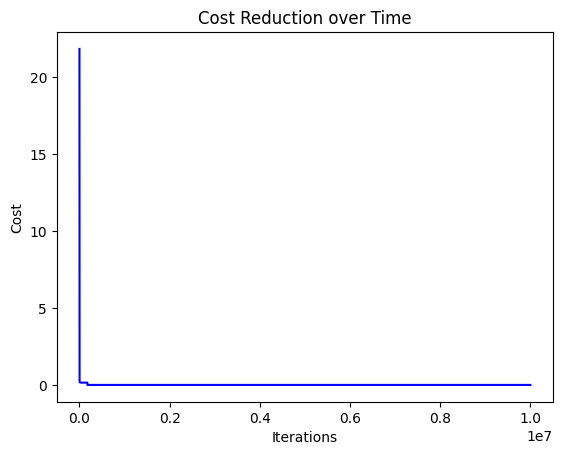

RMSE of GD: 0.3849741916119337


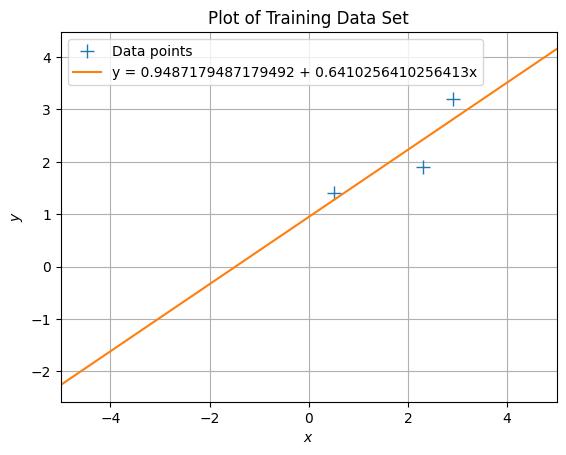

In [31]:

def gradient_descent(Phi, y, theta, alpha, iterations):
    """Perform gradient descent to learn theta"""
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        prediction = Phi.dot(theta)
        error = y - prediction
        gradient = -(2/m) * Phi.T.dot(error)
        alpha_new = alpha / (1 + 0.000001 * it)
        theta = theta - alpha_new * gradient
        cost_history[it] = loss_function(Phi, y, theta)
        if np.isnan(cost_history[it]) or (it > 0 and cost_history[it] > cost_history[it - 1]):
            print(f"Breaking at iteration {it} due to NaN or increase in cost.")
            break
    return theta, cost_history

def loss_function(Phi, y, theta):
    """Compute cost for linear regression"""
    return np.mean((y - Phi.dot(theta)) ** 2)

np.random.seed(41)
numberTheta = 2
theta = np.random.uniform(-1, 1, (numberTheta, 1))  # Initialize theta
alpha = 0.0002  # Learning rate
iterations = 10000000  # Number of iterations

# Run Gradient Descent
theta_gd, cost_history = gradient_descent(X_aug, y, theta, alpha, iterations)
print("theta_gd:", theta_gd)

# Plot the cost history over iterations
plt.figure()
plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Reduction over Time')
plt.show()

Xtest = np.linspace(-5, 5, 100).reshape(-1, 1)  # 100 x 1 vector of test inputs
Xtest_aug = np.hstack((np.ones((Xtest.shape[0], 1)), Xtest))  # 100 x (D + 1) vector of test inputs
ml_prediction = predict_with_estimate(Xtest_aug, theta_gd)
y_pred_gd = predict_with_estimate(X_aug, theta_gd)

# Calculate RMSE for the test set
rmse_test = RMSE(y, y_pred_gd)
print("RMSE of GD:", rmse_test)

plt.figure()
plt.plot(X, y, '+', markersize=10, label='Data points')
plt.plot(Xtest, ml_prediction, label=f'y = {theta_ml[0][0]} + {theta_ml[1][0]}x')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Plot of Training Data Set')
plt.xlim([-5, 5])  # Setting x-axis limits
plt.grid(True)
plt.legend()
plt.show()
